In [53]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os
# !pip install jupyter-dash
import dash
import torch 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import sklearn.neural_network as ml
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from dash.dependencies import Input, Output, State, ClientsideFunction
import dash_core_components as dcc
import dash_html_components as html


In [2]:
uploaded = files.upload()

Saving Folds5x2_pp.xlsx to Folds5x2_pp.xlsx


**Basic Data Preparation**


In [54]:
#Load Data
df=pd.read_excel("Folds5x2_pp.xlsx", sep=',', error_bad_lines=False, index_col=False, dtype='unicode')


In [55]:
df=df.apply(pd.to_numeric)#Transfer to Numeric
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [56]:
df.describe()#Basic description of the data

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [57]:
df.cov() #Covarriance of the dataset

,AT,V,AP,RH,PE
AT,55.539357,79.941324,-22.463437,-59.032171,-120.593715
V,79.941324,161.490544,-31.206771,-57.922808,-188.642778
AP,-22.463437,-31.206771,35.269152,8.633874,52.546510
RH,-59.032171,-57.922808,8.633874,213.167848,97.129952
PE,-120.593715,-188.642778,52.546510,97.129952,291.282318


In [58]:
df.corr() #Correlation between the features

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

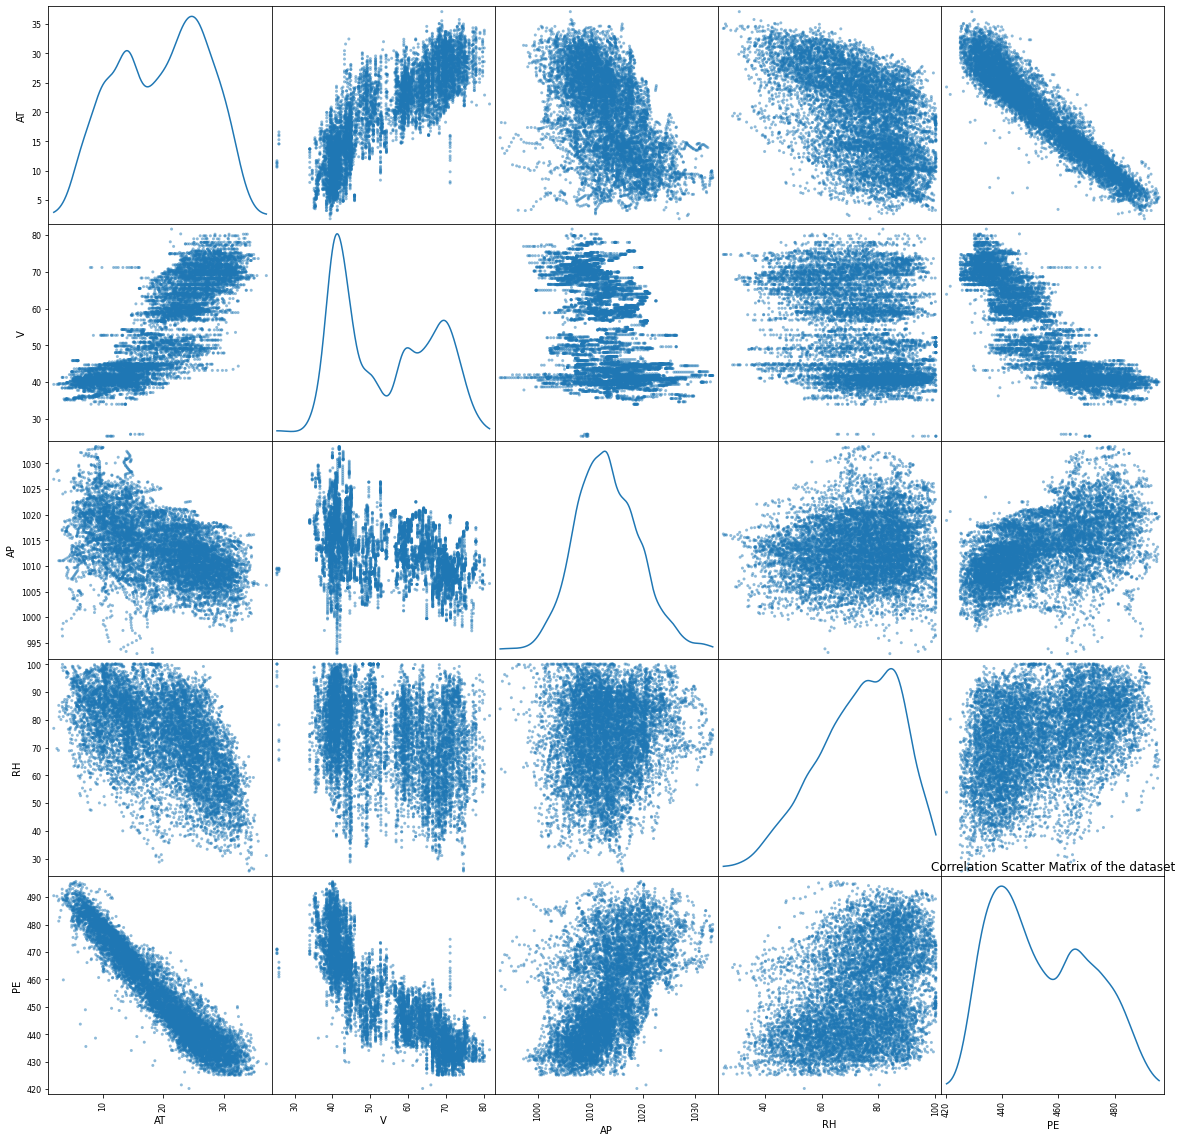

In [146]:
pd.plotting.scatter_matrix(df,diagonal="kde",figsize=(20,20))#Scatter Matrix to find any pattern
plt.savefig(r'Scatter Matrix.png')
files.download('Scatter Matrix.png')
#Heatmap

Text(0.5, 1.0, 'Correlation Heatmap of the dataset')

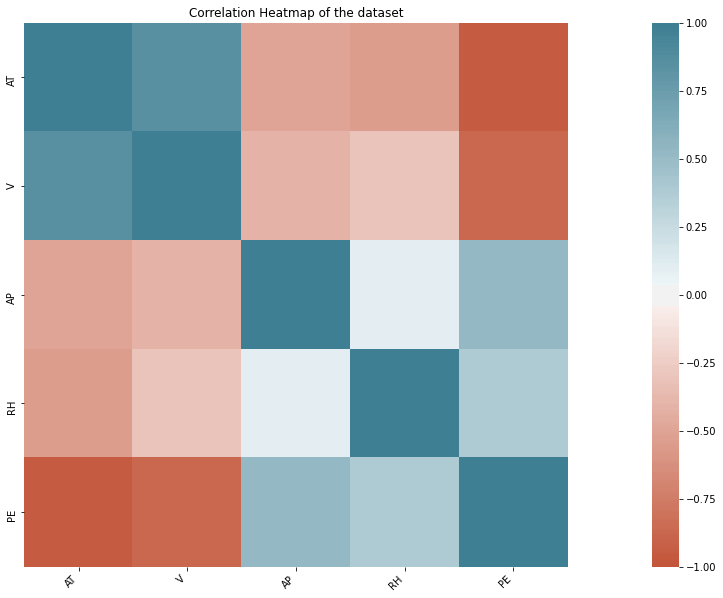

In [147]:
corr = df.corr()
plt.figure(figsize=(30,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title("Correlation Heatmap of the dataset")
# plt.savefig(r'heatmap.png')
# files.download('heatmap.png')

In [61]:
X=df.loc[:,"AT":"RH"]#Input Features
y=df["PE"]#Output Feature
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.8,random_state=0) #80% training data and 20% testing data for whole dataset without any Standardization or Normalizations

In [62]:
print(type(min(X.min(axis=0))))

<class 'float'>


**Standardization.**

In [63]:
X_scale_val=df.loc[:,"AT":"RH"].values
y_scale_val=df["PE"].values
X_scale=StandardScaler()#Standerdizing the data.
y_scale=StandardScaler()
X_after_scale=X_scale.fit_transform(X_scale_val)
y_after_scale=y_scale.fit_transform(y_scale_val.reshape(-1,1))
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled= train_test_split(X_after_scale,y_after_scale,train_size=0.8,random_state=0)#Standardized Train test Spilit

**Normalization.**

In [64]:
X_norm=MinMaxScaler()#Normalizing data.
y_norm=MinMaxScaler()
X_after_norm=X_norm.fit_transform(X)
y_after_norm=y_norm.fit_transform(y.values.reshape(-1,1))
X_train_norm, X_test_norm, y_train_norm, y_test_norm= train_test_split(X_after_norm,y_after_norm,train_size=0.8, random_state=0)#Normalized Train test Spilit

**MAE(Mean absolute error) , RMSE (Root Mean Squared Error) ,R^2 (Coefficient of determination) for Linear Regression.**

In [65]:
#Linear Regression Train
lr=LinearRegression()
lr.fit(X_train_scaled,y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
lr.coef_


array([[-0.86158728, -0.17609519,  0.02222787, -0.13522399]])

In [67]:
lr.intercept_

array([-0.00022411])

In [68]:
#Linear Regression Prediction
Y_lr_predict=lr.predict(X_test_scaled) 

In [69]:
#MAE
mean_absolute_error(y_test_scaled,Y_lr_predict)


0.20898529880027125

In [70]:
#RMSE
math.sqrt(mean_squared_error(y_test_scaled, Y_lr_predict))

0.26029743480646256

In [71]:
#R^2 score
lr.score(X_test_scaled,y_test_scaled)

0.9325315554761302

In [72]:
#R^2 score of Linear Regression after K-fold cross validation
lr_for_cross_validation=LinearRegression()
cross_validation_lr=cross_val_score(lr_for_cross_validation,X_after_scale,y_after_scale,cv=10)
cross_validation_lr.mean()

0.9285245252500409

In [73]:
#MAE score of Linear Regression after K-fold cross validation 
cross_validation_lr=cross_val_score(lr_for_cross_validation,X_after_scale,y_after_scale,cv=10,scoring='neg_mean_absolute_error')
cross_validation_lr=-cross_validation_lr
cross_validation_lr.mean()

0.21257705181382253

In [74]:
#RMSE score of Linear Regression after K-fold cross validation 
cross_validation_lr=cross_val_score(lr_for_cross_validation,X_after_scale,y_after_scale,cv=10,scoring='neg_mean_squared_error')
cross_validation_lr=-cross_validation_lr
cross_validation_lr=cross_validation_lr.mean()
math.sqrt(cross_validation_lr)

0.26719809083015766

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

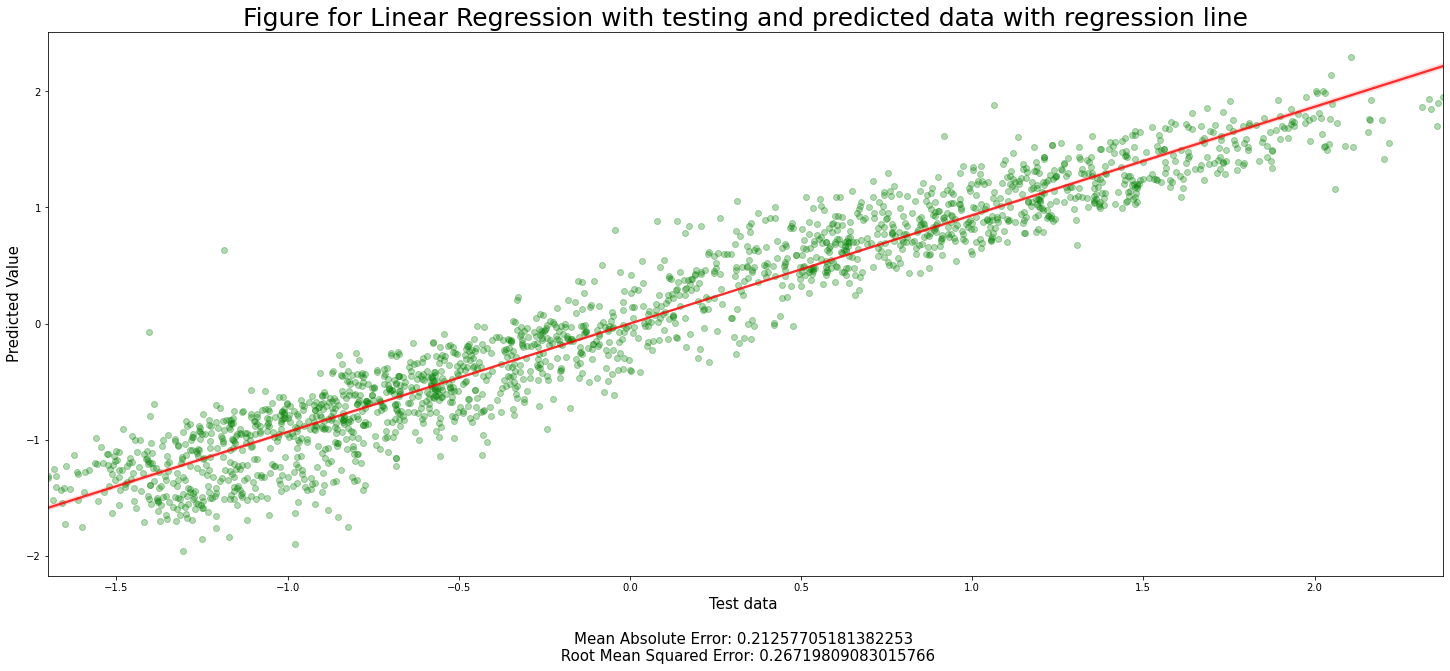

In [138]:
plt.figure(figsize=[25,10])
sns.regplot(x=y_test_scaled, y=Y_lr_predict, scatter_kws = {'color': 'g','alpha': 0.3}, line_kws = {'color': 'red','alpha': 0.8})
plt.title("Figure for Linear Regression with testing and predicted data with regression line", fontsize=25)
plt.xlabel("Test data \n\nMean Absolute Error: 0.21257705181382253 \n Root Mean Squared Error: 0.26719809083015766",fontsize=15)
plt.ylabel("Predicted Value",fontsize=15)
# plt.legend(['Training','Predicted'])
plt.savefig("Linear Regression.png",format="png")
files.download("Linear Regression.png")

**MAE(Mean absolute error) , RMSE (Root Mean Squared Error) ,R^2 (Coefficient of determination) for Support Vector Machine.**

In [76]:
svr=SVR()

In [77]:
#Hyperparameter Tuning
param_for_SVR={
    'kernel':['linear', 'poly', 'rbf'],
    'C':[1,10,20]
}
SVR_hyper_optimization= GridSearchCV(svr,param_grid=param_for_SVR,n_jobs=-1,cv=5,verbose=3)

In [78]:
SVR_hyper_optimization.fit(X_after_scale,y_after_scale.ravel())


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 11.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 20], 'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [79]:
SVR_hyper_optimization.best_estimator_


SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [80]:
svr=SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [81]:
#SVR Train and prediction
svr.fit(X_train_scaled,y_train_scaled.ravel())
svr_predict=svr.predict(X_test_scaled)


In [82]:
#MAE
mean_absolute_error(y_test_scaled,svr_predict)

0.1710817383991622

In [83]:
#RMSE
math.sqrt(mean_squared_error(y_test_scaled, svr_predict))

0.22505100858580182

In [84]:
#R^2 score
svr.score(X_test_scaled,y_test_scaled)

0.9495660656896214

In [85]:
#R^2 value of SVR after K-fold cross_validation
svr_for_cross_validation=SVR(C=30, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
cross_validation_svr=cross_val_score(svr_for_cross_validation,X_after_scale,y_after_scale.ravel(),cv=10)
cross_validation_svr.mean()

0.946245716936781

In [86]:
#MAE score of SVR after K-fold cross validation 
cross_validation_svr=cross_val_score(svr_for_cross_validation,X_after_scale,y_after_scale.ravel(),cv=10,scoring='neg_mean_absolute_error')
cross_validation_svr=-cross_validation_svr
cross_validation_svr.mean()

0.17189446650992435

In [87]:
#RMSE score of SVR after K-fold cross validation 
cross_validation_svr=cross_val_score(svr_for_cross_validation,X_after_scale,y_after_scale.ravel(),cv=10,scoring='neg_mean_squared_error')
cross_validation_svr=-cross_validation_svr
cross_validation_svr=cross_validation_svr.mean()
math.sqrt(cross_validation_svr)


0.23174338510935957

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

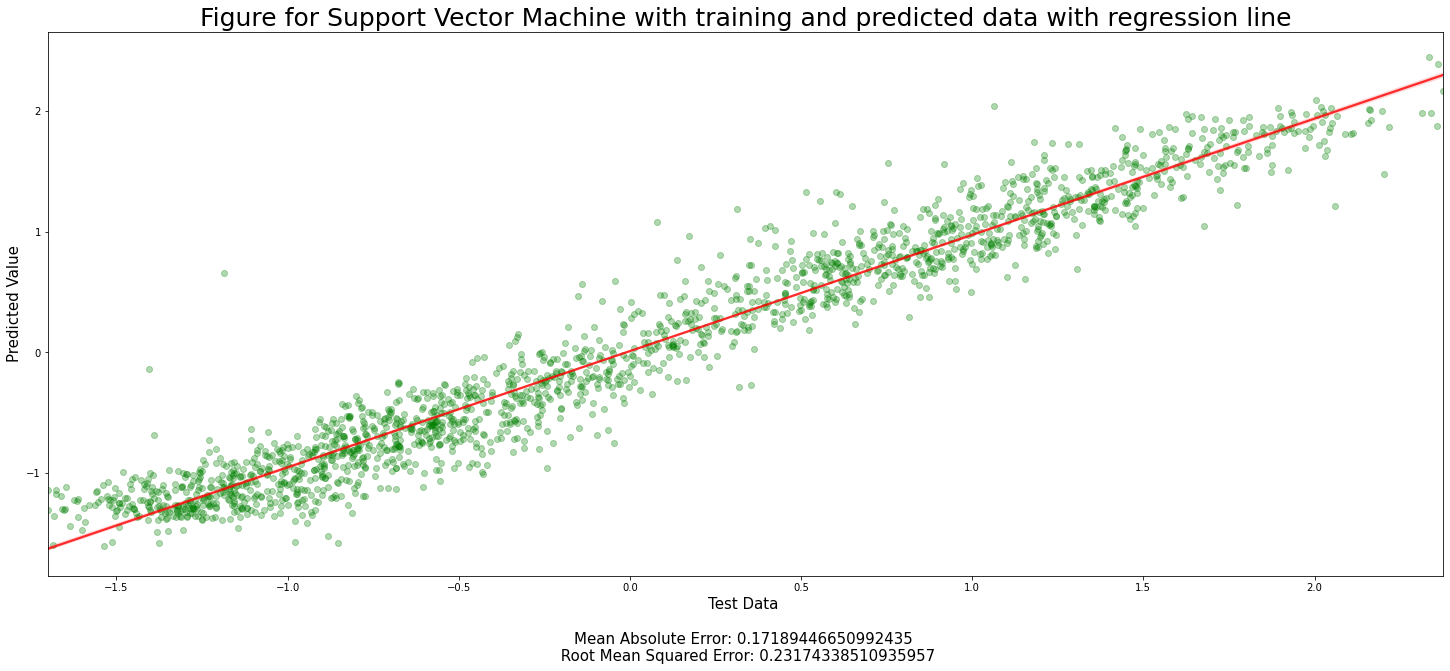

In [139]:
plt.figure(figsize=[25,10])

sns.regplot(x=y_test_scaled, y=svr_predict, scatter_kws = {'color': 'g','alpha': 0.3}, line_kws = {'color': 'red','alpha': 0.8})
plt.title("Figure for Support Vector Machine with training and predicted data with regression line", fontsize=25)
plt.xlabel("Test Data \n\nMean Absolute Error: 0.17189446650992435 \n Root Mean Squared Error: 0.23174338510935957",fontsize=15)
plt.ylabel("Predicted Value",fontsize=15)

# plt.legend(['Training','Predicted'])
plt.savefig("Support Vector.png",format="png")
files.download("Support Vector.png") 

**MAE(Mean absolute error) , RMSE (Root Mean Squared Error) ,R^2 (Coefficient of determination) for Random Forest.**


In [89]:
#Hyperparameter Tuning
param_for_randomFR={
        'n_estimators':[50,100,200,300],
        'criterion':['mse', 'mae'],
        'max_features':['auto','sqrt','log2']
}

In [90]:
randomFR=RandomForestRegressor()
randomFR_hyper_optimization= RandomizedSearchCV(randomFR,param_distributions=param_for_randomFR,n_jobs=-1,cv=5,verbose=3)
randomFR_hyper_optimization.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 23.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [91]:
randomFR_hyper_optimization.best_estimator_


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [92]:
randomFR=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
randomFR.fit(X_train,y_train)
randomFR_predict=randomFR.predict(X_test)

In [93]:
#MAE
mean_absolute_error(y_test,randomFR_predict)

2.2599991292232526

In [94]:
#RMSE
math.sqrt(mean_squared_error(y_test, randomFR_predict))

3.0856051671831706

In [95]:
#R^2 score
randomFR.score(X_test,y_test)

0.9674483582149841

In [96]:
#R^2 value of Random Forest after K-fold cross_validation
randomFR_for_cross_validation=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
cross_validation_randomFR=cross_val_score(randomFR_for_cross_validation,X,y,cv=10)
cross_validation_randomFR.mean()

0.9654980122283219

In [97]:
#MAE score of Random Forest after K-fold cross validation 
cross_validation_randomFR=cross_val_score(randomFR_for_cross_validation,X,y,cv=10,scoring='neg_mean_absolute_error')
cross_validation_randomFR=-cross_validation_randomFR
cross_validation_randomFR.mean()

2.2303251924926775

In [98]:
#RMSE score of Random Forest after K-fold cross validation 
cross_validation_randomFR=cross_val_score(svr_for_cross_validation,X,y,cv=10,scoring='neg_mean_squared_error')
cross_validation_randomFR=-cross_validation_randomFR
cross_validation_randomFR=cross_validation_randomFR.mean()
math.sqrt(cross_validation_randomFR)

5.298454126257121

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

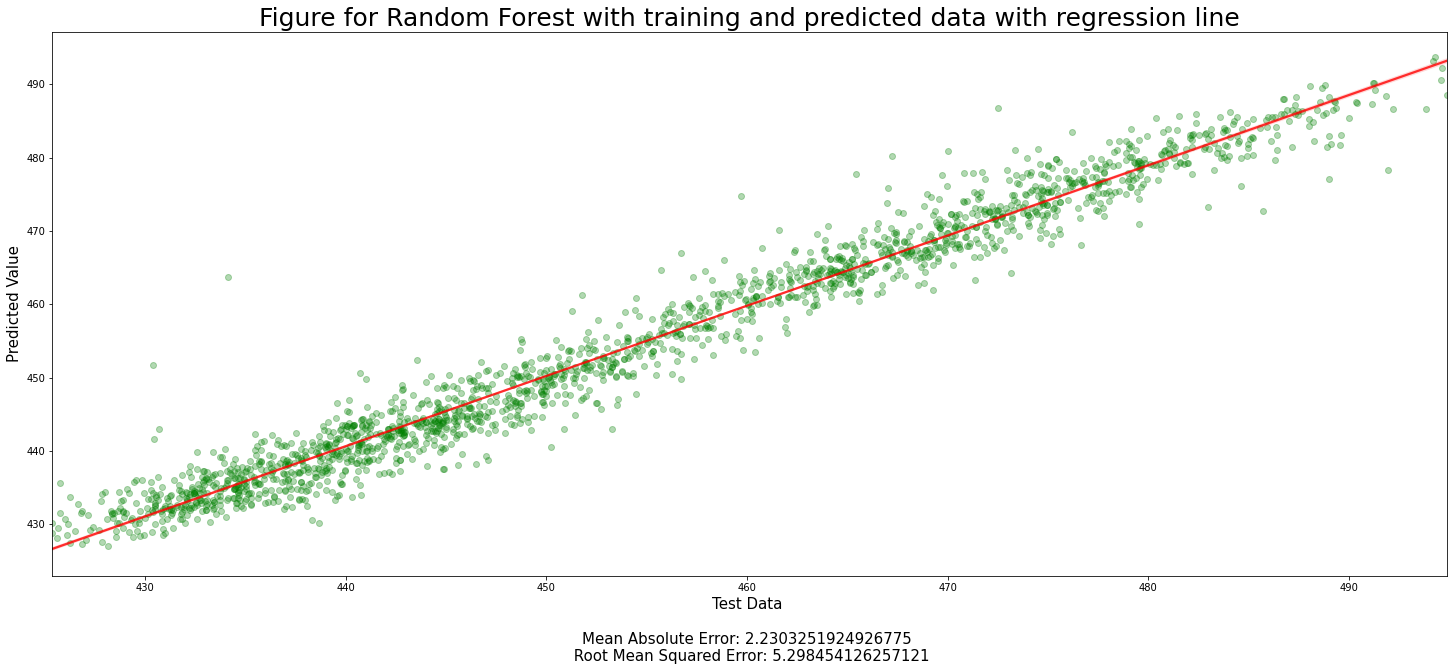

In [140]:
plt.figure(figsize=[25,10])
sns.regplot(x=y_test, y=randomFR_predict, scatter_kws = {'color': 'g','alpha': 0.3}, line_kws = {'color': 'red','alpha': 0.8})
plt.title("Figure for Random Forest with training and predicted data with regression line", fontsize=25)
plt.xlabel("Test Data \n\nMean Absolute Error: 2.2303251924926775 \n Root Mean Squared Error: 5.298454126257121",fontsize=15)
plt.ylabel("Predicted Value",fontsize=15)
plt.savefig("Random Forest.png",format="png")
files.download("Random Forest.png") 

**MAE(Mean absolute error) , RMSE (Root Mean Squared Error) ,R^2 (Coefficient of determination) for Extreme Gradiant Boosting.**

In [100]:
#Hyperparameter Tuning
param_for_xgboost={
    'learning_rate'   :[0.05,0.1,0.15,0.2,0.25,0.3],
    'max_depth'       :[3,4,5,10,15,20],
    'min_child_weight':[1,3,5,7],
    'gamma'           :[0,0.1,0.2,0.3,0.4],
    'booster'         :['gbtree', 'gblinear','dart'],
    'objective'       :['reg:squarederror']
}

In [101]:
xgboost=xgb.XGBRegressor()
xgboost_hyper_optimization=RandomizedSearchCV(xgboost,param_distributions=param_for_xgboost,n_jobs=-1,cv=5,verbose=3)

In [102]:
xgboost_hyper_optimization.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   38.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'da

In [103]:
xgboost_hyper_optimization.best_estimator_

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.4,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=20, min_child_weight=7, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [104]:
xgboost=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.3,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [105]:
#Extreme Gradiant Boosting Train
xgboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.3,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [106]:
#Extreme Gradiant Boosting Test
xgboost_predict=xgboost.predict(X_test)

In [107]:
#MAE
mean_absolute_error(y_test,xgboost_predict)

2.0619669022355835

In [108]:
#RMSE
math.sqrt(mean_squared_error(y_test, xgboost_predict))

2.915915744507141

In [109]:
#R^2 score
xgboost.score(X_test,y_test)

0.9709301940217063

In [110]:
#R^2 value of Extreme Gradiant Boosting after K-fold cross_validation
xgboost_for_cross_validation=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=20, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
cross_validation_xgboost=cross_val_score(xgboost_for_cross_validation,X,y,cv=10)
cross_validation_xgboost.mean()

0.9696735634948874

In [111]:
#MAE score of Extreme Gradiant Boosting after K-fold cross validation 
cross_validation_xgboost=cross_val_score(xgboost_for_cross_validation,X,y,cv=10,scoring='neg_mean_absolute_error')
cross_validation_xgboost=-cross_validation_xgboost
cross_validation_xgboost.mean()

2.0500352389367147

In [112]:
#RMSE score of Extreme Gradiant Boosting after K-fold cross validation 
cross_validation_xgboost=cross_val_score(xgboost_for_cross_validation,X,y,cv=10,scoring='neg_mean_squared_error')
cross_validation_xgboost=-cross_validation_xgboost
cross_validation_xgboost=cross_validation_xgboost.mean()
math.sqrt(cross_validation_xgboost)

2.9709087128951

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

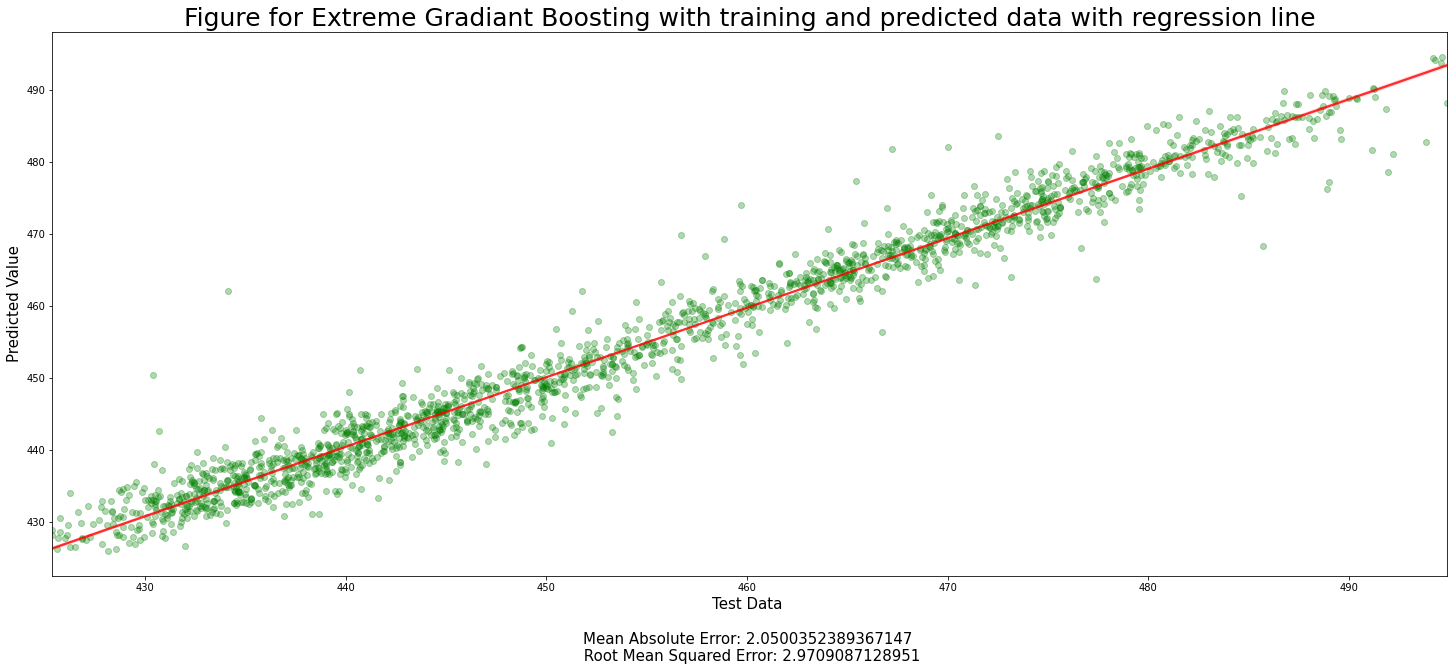

In [145]:
plt.figure(figsize=[25,10])
sns.regplot(x=y_test, y=xgboost_predict, scatter_kws = {'color': 'g','alpha': 0.3}, line_kws = {'color': 'red','alpha': 0.8})
plt.title("Figure for Extreme Gradiant Boosting with training and predicted data with regression line", fontsize=25)
plt.xlabel("Test Data \n\nMean Absolute Error: 2.0500352389367147 \n Root Mean Squared Error: 2.9709087128951",fontsize=15)
plt.ylabel("Predicted Value",fontsize=15)
plt.savefig("Extreme Gradiant Boosting.png",format="png")
files.download("Extreme Gradiant Boosting.png")

**MAE(Mean absolute error) , RMSE (Root Mean Squared Error) ,R^2 (Coefficient of determination) for Neural Network.**

In [114]:
#Hyperparameter Tuning
param_for_ann={
    'activation': ['logistic','relu'],
    'solver':['lbgfs','sgd','adam'],
    'max_iter':[200,300,400,500],
    'learning_rate':['constant','adaptive'],
    'learning_rate_init':[.001,.01,.1,.2,.3],
    'hidden_layer_sizes':[100,200,50]
}

In [115]:
ann=ml.MLPRegressor()
ann_hyper_optimization=RandomizedSearchCV(ann,param_distributions=param_for_ann,n_jobs=-1,cv=5,verbose=3)
ann_hyper_optimization.fit(X_train_norm,y_train_norm.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   43.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                          batch_size='auto', beta_1=0.9,
                                          beta_2=0.999, early_stopping=False,
                                          epsilon=1e-08,
                                          hidden_layer_sizes=(100,),
                                          learning_rate='constant',
                                          learning_rate_init=0.001,
                                          max_fun=15000, max_iter=200,
                                          momentum=0.9, n_iter_no_change=10,
                                          nesterovs_momentum=True, power_t=0.5,
                                          random_...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'activation': ['logistic', 'relu'],
                                        'hidden_layer_

In [116]:
ann_hyper_optimization.best_estimator_


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=100, learning_rate='adaptive',
             learning_rate_init=0.2, max_fun=15000, max_iter=500, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [117]:
#Neural Network Training
ann=ml.MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=200, learning_rate='constant',
             learning_rate_init=0.01, max_fun=15000, max_iter=400, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
ann.fit(X_train_norm,y_train_norm.ravel())
#Neural Network prediction
ann_predict=ann.predict(X_test_norm)

In [118]:
#MAE
mean_absolute_error(y_test_norm,aan_predict)


0.0473791778963352

In [119]:
#RMSE
math.sqrt(mean_squared_error(y_test_norm, aan_predict))

0.05881146009464114

In [120]:
#R^2 Score
ann.score(X_test_norm,y_test_norm)

0.9210898199083085

In [131]:
#R^2 value of Neural Network after K-fold cross_validation
ann_for_cross_validation=ml.MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=200, learning_rate='constant',
             learning_rate_init=0.01, max_fun=15000, max_iter=400, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)
cross_validation_ann=cross_val_score(ann_for_cross_validation,X_after_norm,y_after_norm.ravel(),cv=10)
cross_validation_ann.mean()

0.902574469923018

In [132]:
#MAE score of Neural Network after K-foldcross validation 
cross_validation_ann=cross_val_score(ann_for_cross_validation,X_after_norm,y_after_norm.ravel(),cv=10,scoring='neg_mean_absolute_error')
cross_validation_ann=-cross_validation_ann
cross_validation_ann.mean()

0.05174875858175802

In [133]:
#RMSE score of Extreme Neural Network after K-fold cross validation 
cross_validation_ann=cross_val_score(ann_for_cross_validation,X_after_norm,y_after_norm.ravel(),cv=10,scoring='neg_mean_squared_error')
cross_validation_ann=-cross_validation_ann
cross_validation_ann=cross_validation_ann.mean()
math.sqrt(cross_validation_ann)

0.07889574129707919

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

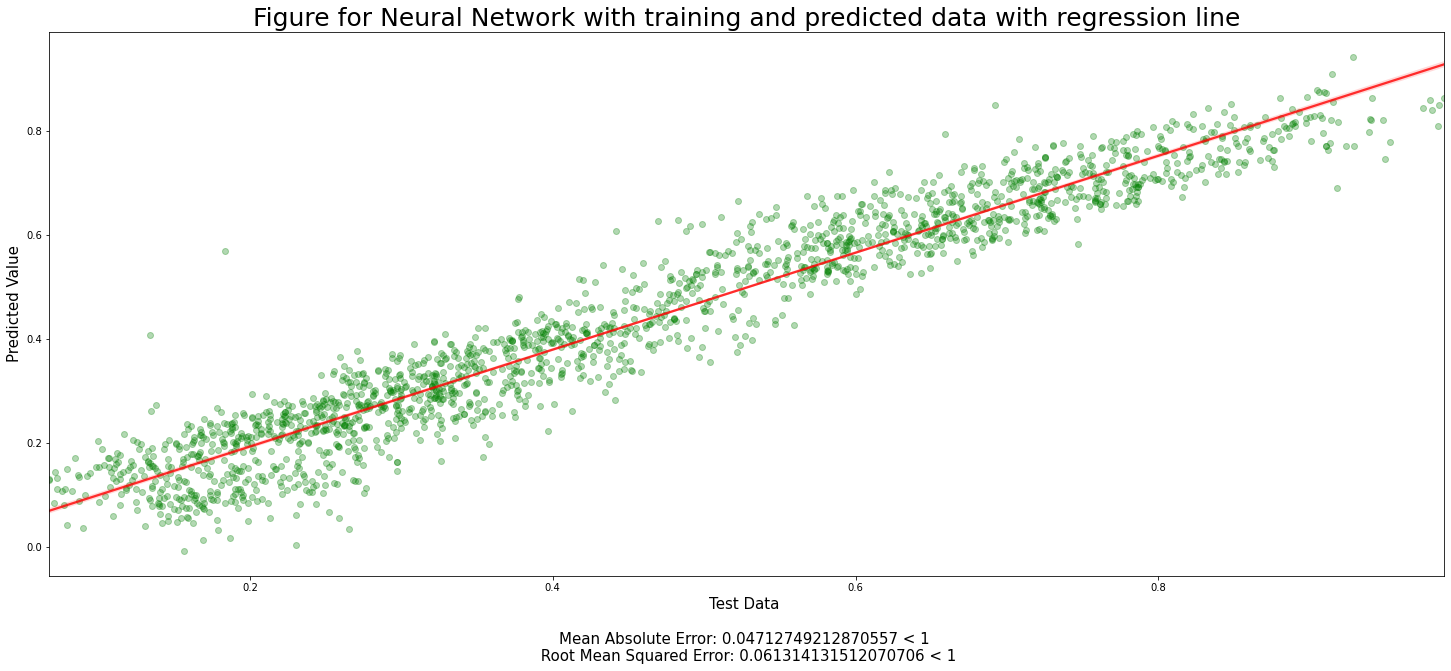

In [144]:
plt.figure(figsize=(25,10))
sns.regplot(x=y_test_norm, y=ann_predict, scatter_kws = {'color': 'g','alpha': 0.3}, line_kws = {'color': 'red','alpha': 0.8})
plt.title("Figure for Neural Network with training and predicted data with regression line", fontsize=25)
plt.xlabel("Test Data \n\nMean Absolute Error: 0.04712749212870557 < 1 \n Root Mean Squared Error: 0.061314131512070706 < 1",fontsize=15)
plt.ylabel("Predicted Value",fontsize=15)
plt.savefig("Neural Network.png",format="png")
files.download("Neural Network.png")